In [21]:
import numpy as np
from matplotlib import pylab as plt
import networkx as nx

In [22]:
points =[[0,4,5],
         [0,1,2],
         [0,3,12],
         [1,3,8],
         [1,2,4],
         [2,3,3],
         [2,4,3],
         [3,4,10]]

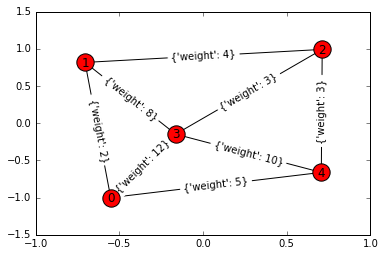

In [23]:
G= nx.Graph()
for point in points:
    G.add_edge(point[0],point[1],weight=point[2])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edge_labels(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [37]:
size=5
R = np.array(np.ones([size,size+1,size,size+1]))
R*=999
R
istate = 0
for point in points:
    for hop in range(5):
        R[point[0]][hop][point[1]][hop+1]=0
        R[point[1]][hop][point[0]][hop+1]=0
for i in range(5):
    R[i][4][0][5]=-100
R

array([[[[ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,    0.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,    0.,  999.,  999.,  999.,  999.],
         [ 999.,    0.,  999.,  999.,  999.,  999.]],

        [[ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,    0.,  999.,  999.,  999.],
         [ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,    0.,  999.,  999.,  999.],
         [ 999.,  999.,    0.,  999.,  999.,  999.]],

        [[ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,  999.,    0.,  999.,  999.],
         [ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,  999.,    0.,  999.,  999.],
         [ 999.,  999.,  999.,    0.,  999.,  999.]],

        [[ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,  999.,  999.,    0.,  999.],
         [ 999.,  999.,  999.,  999.,  999.,  999.],
         [ 999.,  999.,  999.,  999.,   

In [140]:
g=0.8
Q = np.array(np.zeros(shape=(size,size+1,size,size+1)))

In [141]:
def availableActions(current_state):
    next_possibilities = R[current_state[0]][current_state[1]]
    available_states = []
    for state in range(size):
        if(next_possibilities[state][current_state[1]+1]==0):
            available_states.append(state)
    #print(available_states)
    return available_states

def next_action(available_states):
    next_act = np.random.choice(available_states,1)[0]
    #print(next_act)
    return next_act;

def update(current_state,next_state,hop):
    max_index= np.where(Q[next_state,hop+1,]==np.min(Q[next_state,hop+1]))[1]
    if(max_index.shape[0]>1):
        max_index = int(np.random.choice(max_index,1))
    else:
        max_index = int(max_index)
    Q[current_state,hop,next_state,hop+1]=R[current_state,hop,next_state,hop+1]-g*Q[next_state,hop+1,max_index,hop+1]
    print(max_index)
    return (np.sum(Q))

In [142]:
scores = []
for epoch in range(100):
    current_state = np.random.randint(0,size-1)
    current_hop = np.random.randint(0,size)
    #print(current_hop,current_state)
    av_actions = availableActions((current_state,current_hop))
    n_action = next_action(av_actions)
    scores.append(update(current_state,n_action,current_hop))
    print(n_action)
Q

2
4


IndexError: index 5 is out of bounds for axis 2 with size 5